In [252]:
import lxml.html
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np

from logging import getLogger,StreamHandler
import re
import urllib.request
import json

%matplotlib inline

In [529]:
df_player_url = pd.DataFrame()
parser = lxml.html.HTMLParser(encoding='utf8')

url = 'http://baseballdata.jp/ptop.html'
tree = lxml.html.parse(url,parser)

for tr_item in tree.xpath('//table/tbody/tr'):
    for td_item in tr_item.getchildren():
        if '選手名' in td_item.text_content():
            print('hoge')
            break
        
        name_item = td_item.text_content().split(':')[1]
        for a in td_item.getchildren():
            url = a.attrib['href']
            name = a.text.split(':')[1].replace('　','')
            print(name,attr)
            row = {
                'url':url,
                'name':name,
            }
            df_player_url = df_player_url.append(row,ignore_index=True)
        break
#         print(td_item.text)
#     print(i.text_content())

hoge
角中勝也 playerB/900044.html
陽岱鋼 playerB/900044.html
田中賢介 playerB/900044.html
秋山翔吾 playerB/900044.html
内川聖一 playerB/900044.html
鈴木大地 playerB/900044.html
栗山巧 playerB/900044.html
柳田悠岐 playerB/900044.html
糸井嘉男 playerB/900044.html
Ｔ－岡田 playerB/900044.html
金子侑司 playerB/900044.html
中村晃 playerB/900044.html
デスパイネ playerB/900044.html
西川遥輝 playerB/900044.html
レアード playerB/900044.html
茂木栄五郎 playerB/900044.html
hoge
岡島豪郎 playerB/900044.html
浅村栄斗 playerB/900044.html
田村龍弘 playerB/900044.html
西野真弘 playerB/900044.html
長谷川勇也 playerB/900044.html
中島卓也 playerB/900044.html
メヒア playerB/900044.html
今宮健太 playerB/900044.html
銀次 playerB/900044.html
松田宣浩 playerB/900044.html
中村剛也 playerB/900044.html
安達了一 playerB/900044.html
中田翔 playerB/900044.html
ウィーラー playerB/900044.html
清田育宏 playerB/900044.html
hoge
hoge


In [530]:
df_player_url

,name,url
0,角中勝也,playerB/700087.html
1,陽岱鋼,playerB/600037.html
2,田中賢介,playerB/11905.html
3,秋山翔吾,playerB/1000150.html
4,内川聖一,playerB/11983.html
5,鈴木大地,playerB/1100103.html
6,栗山巧,playerB/12102.html
7,柳田悠岐,playerB/1000128.html
8,糸井嘉男,playerB/400057.html
9,Ｔ－岡田,playerB/600024.html


In [531]:
def read_jsontxt(url):
    """return: json data
    """
    file_str = ''
    with urllib.request.urlopen(url) as response:
        for line in response.readlines():
#         print(line.decode('utf-8'))
            file_str = file_str + line.decode('utf-8')
    print('Read {0} complited!'.format(url))
    data = json.loads(file_str[1:])
    return data

In [532]:
base_url = 'http://baseballdata.jp/'
datas = []
for i,row in df_player_url.iterrows():
    url = base_url + row['url'][:-5] + 'S.txt'    
    jdata = read_jsontxt(url)
    j_item = {
        'jdata':jdata,
        'name':row['name'],
    }
    datas.append(j_item)

Read http://baseballdata.jp/playerB/700087S.txt complited!
Read http://baseballdata.jp/playerB/600037S.txt complited!
Read http://baseballdata.jp/playerB/11905S.txt complited!
Read http://baseballdata.jp/playerB/1000150S.txt complited!
Read http://baseballdata.jp/playerB/11983S.txt complited!
Read http://baseballdata.jp/playerB/1100103S.txt complited!
Read http://baseballdata.jp/playerB/12102S.txt complited!
Read http://baseballdata.jp/playerB/1000128S.txt complited!
Read http://baseballdata.jp/playerB/400057S.txt complited!
Read http://baseballdata.jp/playerB/600024S.txt complited!
Read http://baseballdata.jp/playerB/1200083S.txt complited!
Read http://baseballdata.jp/playerB/800081S.txt complited!
Read http://baseballdata.jp/playerB/1400016S.txt complited!
Read http://baseballdata.jp/playerB/1000100S.txt complited!
Read http://baseballdata.jp/playerB/1500012S.txt complited!
Read http://baseballdata.jp/playerB/1600003S.txt complited!
Read http://baseballdata.jp/playerB/1100130S.txt co

In [264]:
# json dataの加工
def con_json_to_dataframe(data):
    df = pd.DataFrame()

    ptn = re.compile(r'[<>]')
    date = ''
    at_bats = 1
    for k,i_data in enumerate(data):
        i_date = ptn.split(i_data['MD'])[2]
        if i_date == '月日':
            continue

        if i_date != '':
            date = '2016/' + i_date
            at_bats = 1
        else:
            at_bats += 1
    #     print('date: {0}'.format(date))

        bat_result = ptn.split(i_data['RE'])[-5]
        bat_result = bat_result.strip()
        if '(' in bat_result:
            bat_result = bat_result[:-3]
    #     print(bat_result)
        row = {
            'date':date,
            'result':bat_result,
            'at_bats':at_bats,
        }
        df = df.append(row, ignore_index=True)

    parse_dict = {
        'single':['右安','左安','中安','一安','二安','投安','三安','遊安'],
        'double':['右２','中２','左２','遊２'],
        'triple':['右３','中３','左３'],
        'hr':['右本','中本','左本'],
        'bb':['死球','四球','敬遠'],
        'k':['空三振','見三振'],
        'sac_fly':['中犠飛','右犠飛','左犠飛'],
        'bant':['一犠打','捕犠打','投犠打','三犠打'],
    }

    for k,v in parse_dict.items():
        idx = df.result.isin(v)            
        df[k] = np.where(idx,1,0)
    
    return df

In [533]:
for item in datas:
    print(item['name'])
    df = con_json_to_dataframe(item['jdata'])
    df.to_csv('name={0}.csv'.format(item['name']),encoding='utf-8')

角中勝也
陽岱鋼
田中賢介
秋山翔吾
内川聖一
鈴木大地
栗山巧
柳田悠岐
糸井嘉男
Ｔ－岡田
金子侑司
中村晃
デスパイネ
西川遥輝
レアード
茂木栄五郎
岡島豪郎
浅村栄斗
田村龍弘
西野真弘
長谷川勇也
中島卓也
メヒア
今宮健太
銀次
松田宣浩
中村剛也
安達了一
中田翔
ウィーラー
清田育宏


In [519]:
for item in datas:
    print(item['name'])

山田哲人
鈴木誠也
新井貴浩
筒香嘉智
倉本寿彦
坂本勇人
福留孝介
菊池涼介
川端慎吾
村田修一
大島洋平
ナニータ
バレンティン
坂口智隆
長野久義
雄平
丸佳浩
ビシエド
田中広輔
髙山俊
平田良介
桑原将志
ロペス
堂上直倫
ゴメス
鳥谷敬
中村悠平


In [527]:
def plot_rolling(roll=5,target_name=None):
    df = pd.read_csv('name={0}.csv'.format(target_name),index_col=0)
    df['date'] = pd.to_datetime(df.date)
    df['at_bats'] = pd.to_numeric(df['at_bats'],np.int32)
    df['pa'] = 1

    df = df.sort_values(by=['date','at_bats'])

    df.head()

    parse_dict = {
        'sac_fly':['中犠飛','右犠飛','左犠飛'],
        'bant':['一犠打','捕犠打','投犠打','三犠打'],
    }

    for k,v in parse_dict.items():
        idx = df['result'].isin(v)
        df[k] = np.where(idx,1,0)

    df_rolled = df.groupby('date').sum().rolling(roll).sum()
    df_rolled = calclate_ratio_index(df_rolled)

    sns.set(font='IPAexGothic')
    sns.set_context('talk')
    df_rolled[['SLG','AVG']].plot(figsize=(8,6))
    plt.title('{0} {1}試合平均'.format(target_name,roll))
    plt.ylim(0,1.2)
    plt.savefig('figures/{0}_{1}試合平均.png'.format(target_name,roll),dpi=100)

角中勝也
陽岱鋼
田中賢介
秋山翔吾
内川聖一
鈴木大地
栗山巧
柳田悠岐
糸井嘉男
Ｔ－岡田
金子侑司
中村晃
デスパイネ
西川遥輝
レアード
茂木栄五郎
岡島豪郎
浅村栄斗
田村龍弘
西野真弘
長谷川勇也


/home/tyamaguchyi/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


中島卓也
メヒア
今宮健太
銀次
松田宣浩
中村剛也
安達了一
中田翔
ウィーラー
清田育宏


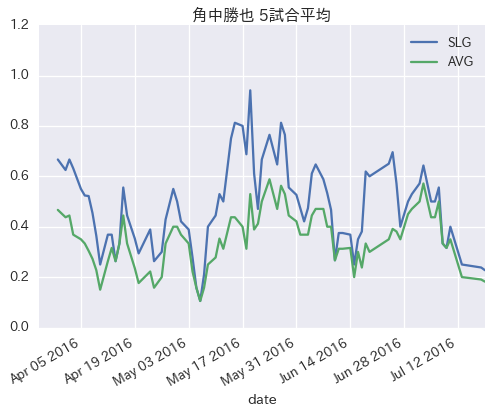

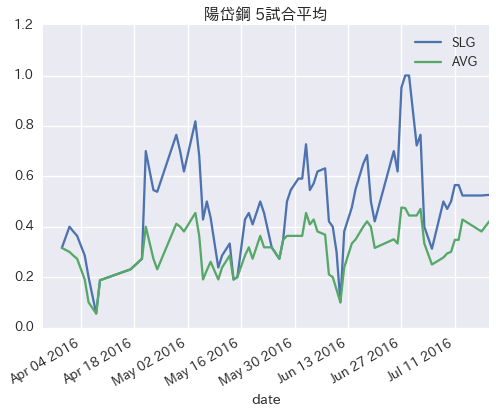

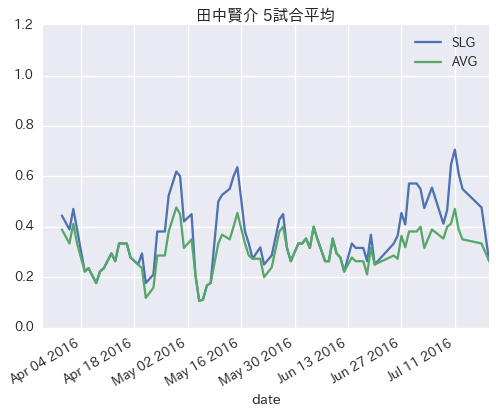

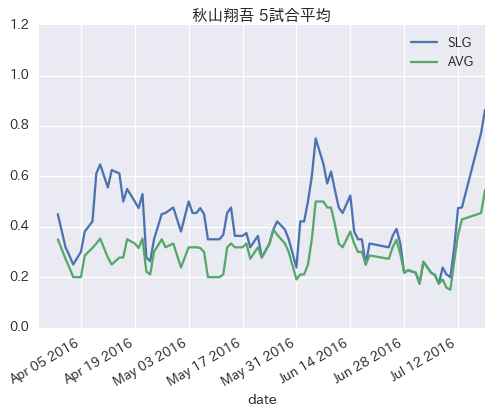

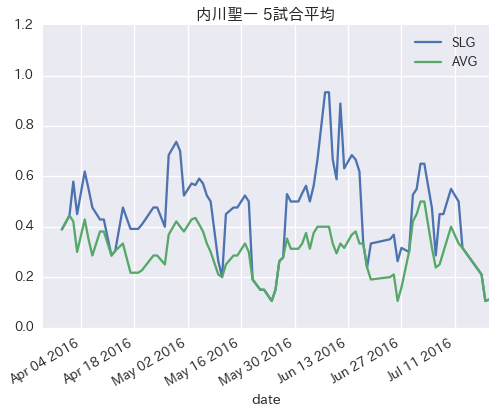

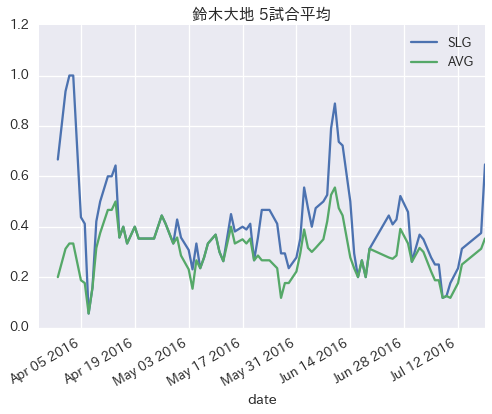

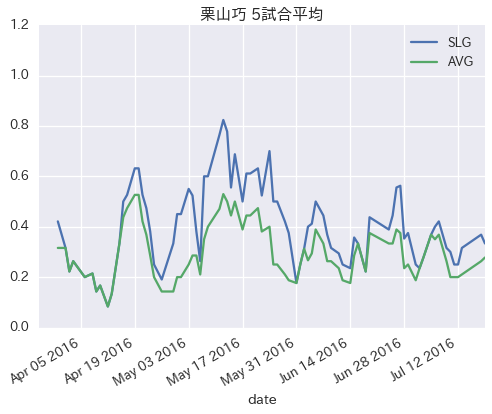

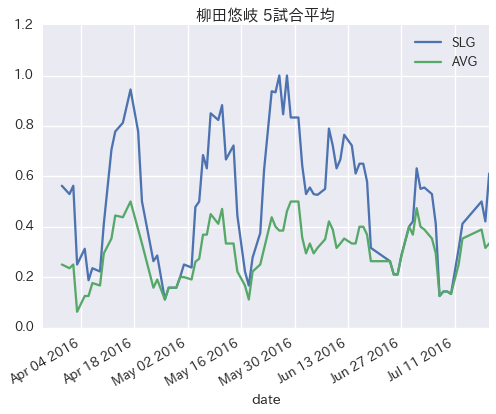

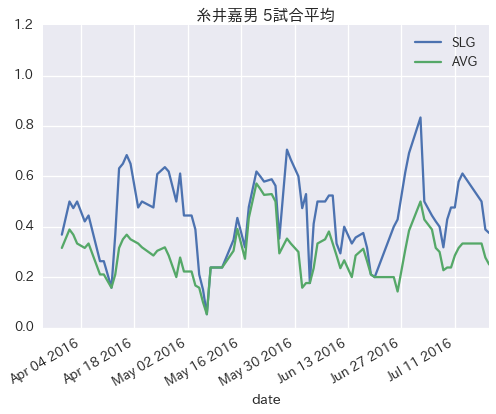

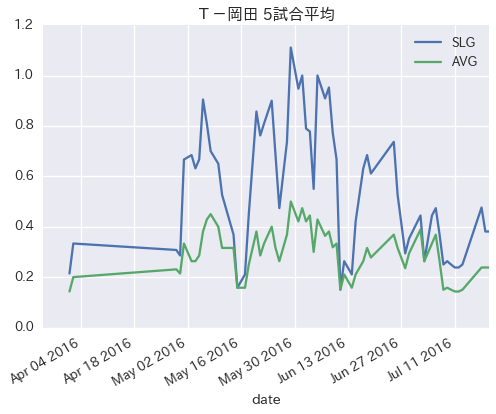

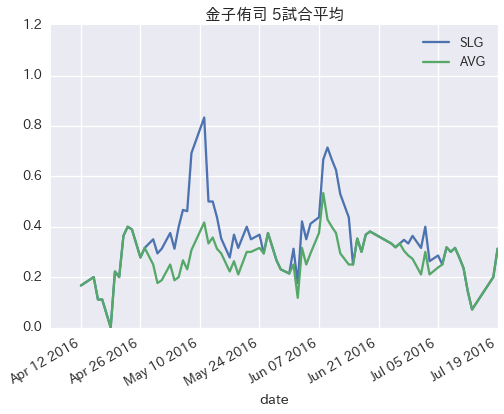

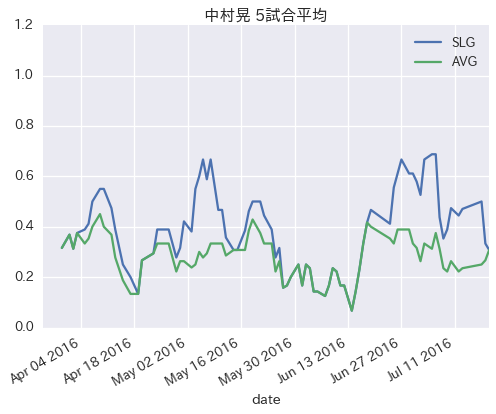

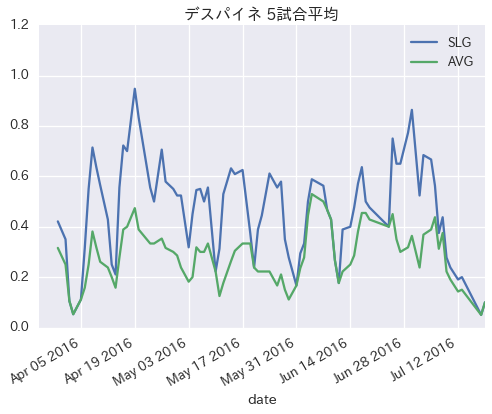

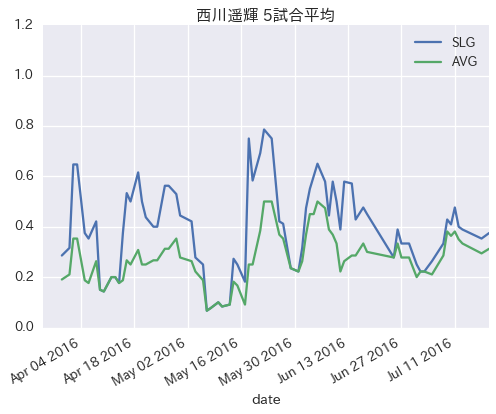

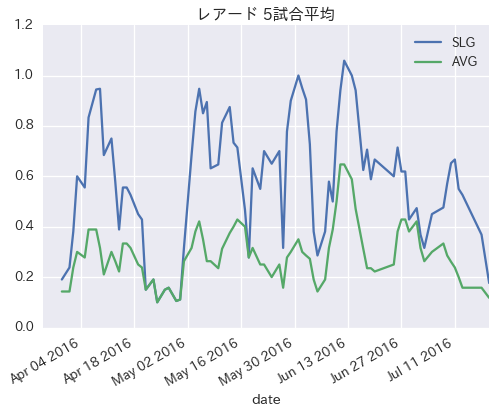

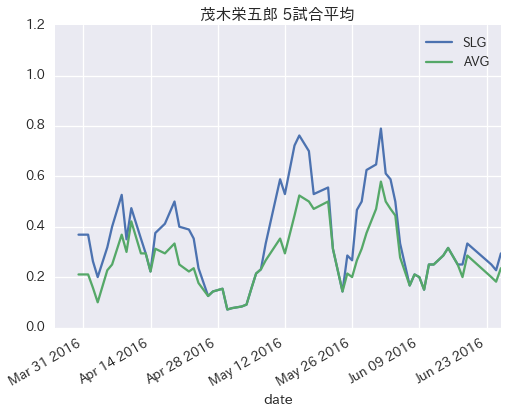

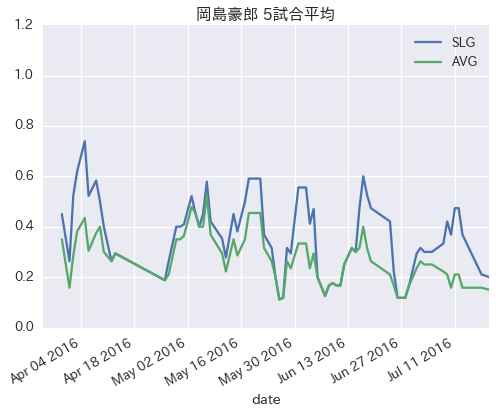

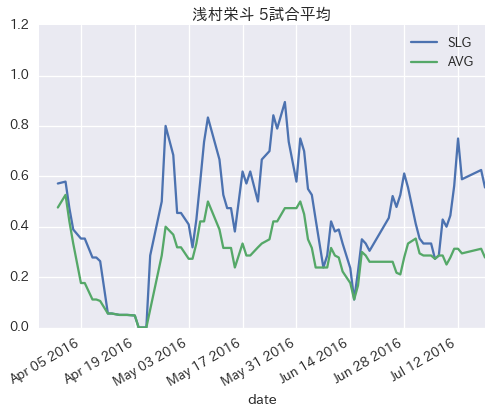

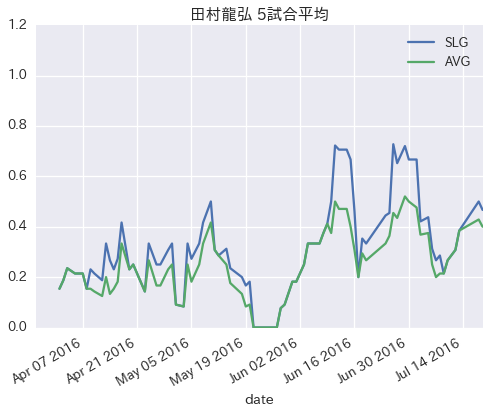

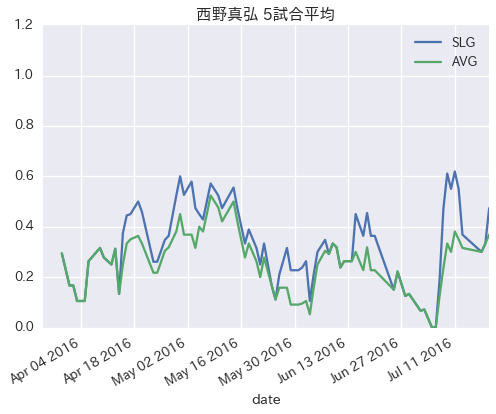

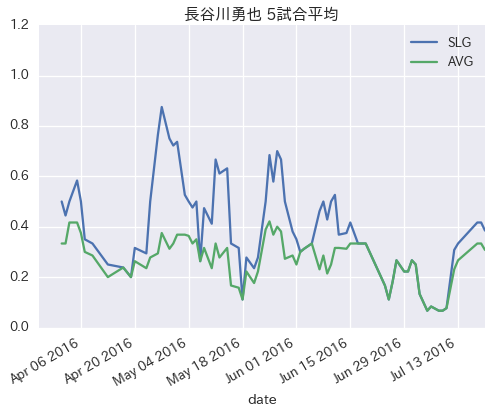

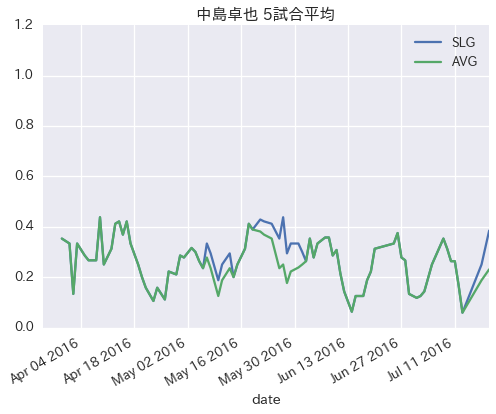

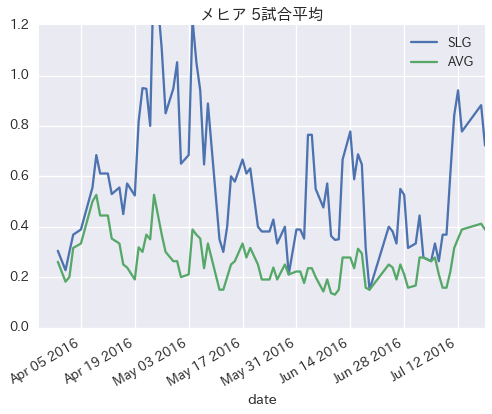

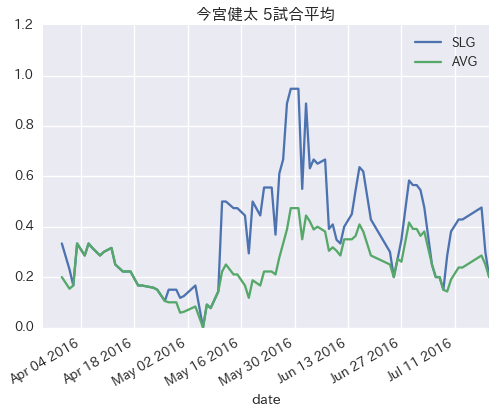

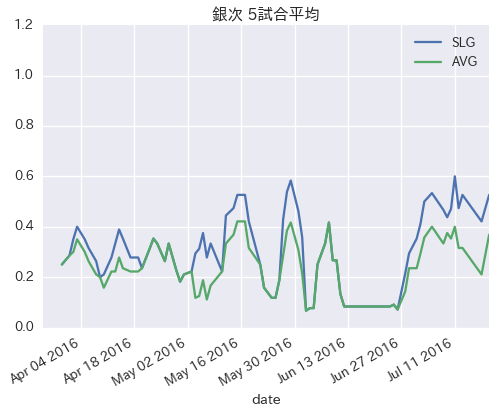

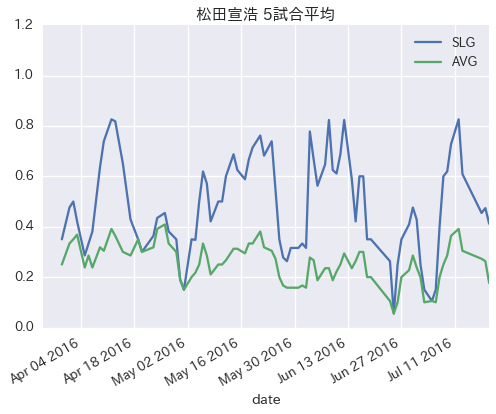

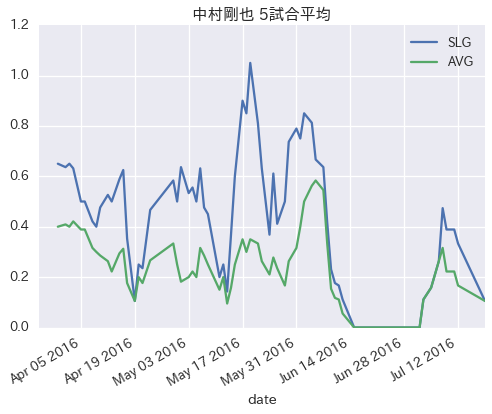

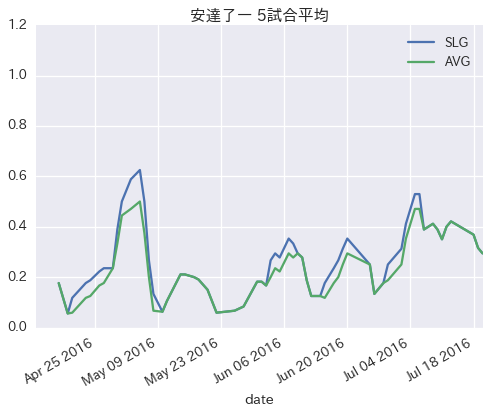

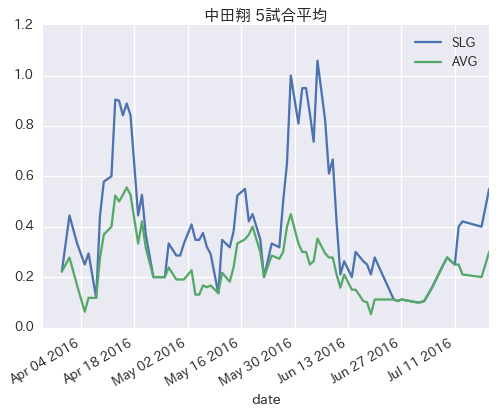

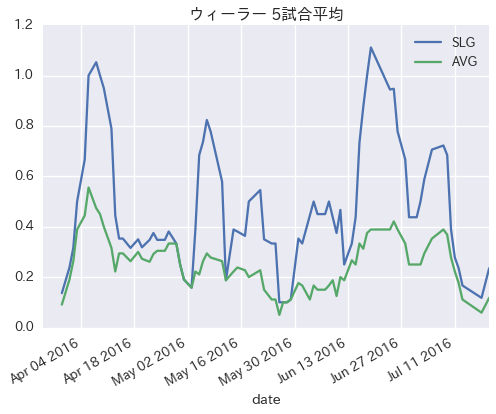

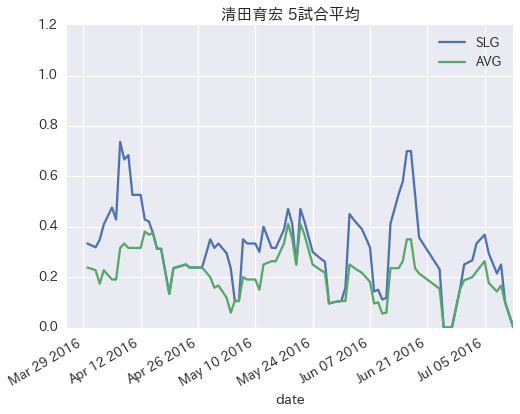

In [534]:
for item in datas:
    print(item['name'])
    plot_rolling(roll=5,target_name=item['name'])

In [446]:
df_sum = pd.DataFrame(df.sum(axis=0))
df_sum = df_sum.T
calclate_ratio_index(df_sum)

,at_bats,hr,ab,bb,single,double,triple,k,sac_fly,bant,pa,hit,bases,AVG,OBP,SLG,OPS,IsoD,IsoP,BABIP
0,1083.0,6.0,326.0,62.0,58.0,10.0,0.0,59.0,6.0,1.0,395.0,74.0,102.0,0.226994,0.350515,0.312883,0.663399,0.123522,0.08589,0.254682


In [432]:
def calclate_ratio_index(df):
    '''各種の指標を計算します
    '''
    
    df['hit'] = df['single'] + df['double'] + df['triple'] + df['hr']
    df['bases'] = df['single'] + df['double']*2 + df['triple']*3 + df['hr']*4
    df['ab'] = df['pa'] - df['bb'] - df['bant'] - df['sac_fly']
    
    # 打率
    df['AVG'] = df['hit'] / df['ab']
    
    # 出塁率
    # (安打 + 四球 + 死球) ÷ (打数 + 四球 + 死球 + 犠飛)
    df['OBP'] = (df['hit'] + df['bb']) / (df['ab'] + df['bb'])
    
    # 長打率
    # 塁打/打数
    df['SLG'] = df['bases'] / df['ab']
    
    # OPS
    # 出塁率 + 長打率
    df['OPS'] = df['SLG'] + df['OBP']
    
    # IsoD
    # 出塁率 - 打率
    df['IsoD'] = df['OBP'] - df['AVG']
    
    # IsoP
    # 長打率 - 打率
    df['IsoP'] = df['SLG'] - df['AVG']
    
    # BABIP
    # （安打-本塁打）÷（打数-奪三振-本塁打＋犠飛）
    df['BABIP'] = (df['hit'] - df['hr']) / (df['ab'] - df['k'] - df['hr'] + df['sac_fly'])
    return df

In [377]:
df 

,at_bats,hr,ab,bb,single,double,triple,k,pa,hit,...,rolled_pa,rolled_ab,rolled_hit,rolled_bases,rolled_atbat,rolled_avg,rolled_ops,rolled_obp,rolled_bbp,rolled_kp
date,,,,,,,,,,,,,,,,,,,,,
2016-03-25,6.0,0,3,1,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-26,10.0,0,4,0,1,0,0,0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-27,10.0,0,4,1,0,1,0,0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-29,10.0,0,4,0,1,0,0,0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-30,6.0,0,3,0,1,1,0,0,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-31,21.0,0,6,0,0,1,0,1,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-01,15.0,0,5,0,1,0,0,1,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-02,6.0,0,3,0,1,0,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-03,15.0,0,4,0,0,0,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
df.tail()

,at_bats,hr,ab,bb,single,double,triple,k,pa,hit,...,rolled_pa,rolled_ab,rolled_hit,rolled_bases,rolled_atbat,rolled_avg,rolled_ops,rolled_obp,rolled_bbp,rolled_kp
date,,,,,,,,,,,,,,,,,,,,,
2016-07-12,10.0,0,4,1,0,1,0,1,4,1,...,39.0,36.0,13.0,25.0,33.0,0.393939,0.757576,0.484848,0.090909,0.181818
2016-07-13,10.0,1,4,0,0,0,0,1,4,1,...,39.0,36.0,13.0,28.0,33.0,0.393939,0.848485,0.484848,0.090909,0.212121
2016-07-18,10.0,0,4,0,0,0,0,2,4,0,...,39.0,37.0,12.0,27.0,35.0,0.342857,0.771429,0.400000,0.057143,0.257143
2016-07-19,15.0,0,5,0,0,1,0,1,5,1,...,40.0,38.0,11.0,27.0,36.0,0.305556,0.750000,0.361111,0.055556,0.250000
2016-07-20,10.0,0,4,0,2,1,0,1,4,3,...,41.0,39.0,14.0,31.0,37.0,0.378378,0.837838,0.432432,0.054054,0.189189


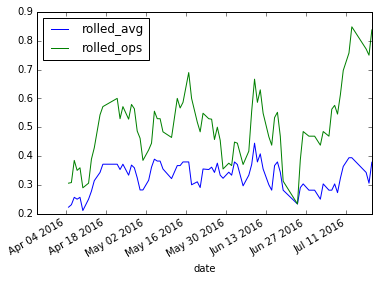

In [366]:
df[['rolled_avg','rolled_ops']].plot()

In [332]:
sm_s = df.sum()

In [335]:
sm_s['ab'] - sm_s['bb']

356.0

In [336]:
sm_s

at_bats          1172.000000
hr                 12.000000
ab                412.000000
bb                 56.000000
single             66.000000
double             19.000000
triple              4.000000
k                  58.000000
pa                412.000000
rolled_hr         111.000000
rolled_single     580.000000
rolled_double     180.000000
rolled_triple      27.000000
rolled_bb         518.000000
rolled_k          530.000000
rolled_pa        3699.000000
rolled_ab        3181.000000
rolled_hit        898.000000
rolled_bases     1465.000000
rolled_atbat     2663.000000
rolled_avg         27.895969
rolled_ops         44.828707
rolled_obp         44.856210
rolled_bbp         16.960241
rolled_kp          16.143672
dtype: float64

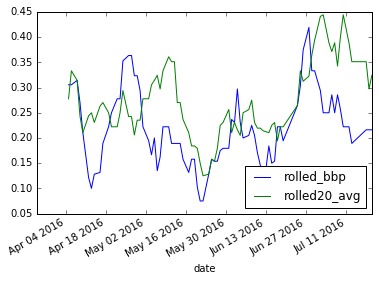

In [202]:
df[['rolled_bbp','rolled20_avg']].plot()

In [162]:
df

,hr,single,double,triple,bb,pa,rolled20_hr,rolled20_single,rolled20_double,rolled20_triple,rolled20_bb,rolled20_hit,rolled20_bases,rolled20_atbat,rolled20_avg,rolled20_ops
date,,,,,,,,,,,,,,,,
2016-03-25,0.0,2.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-26,0.0,2.0,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-27,0.0,0.0,0.0,0.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-29,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,1.0,4.0,4.0,3.0,1.333333,1.333333
2016-03-30,0.0,3.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,1.0,5.0,5.0,4.0,1.250000,1.250000
2016-03-31,0.0,0.0,0.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,2.0,3.0,3.0,2.0,1.500000,1.500000
2016-04-01,0.0,1.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,1.0,4.0,4.0,3.0,1.333333,1.333333
2016-04-02,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0,5.0,5.0,2.0,2.500000,2.500000
2016-04-03,0.0,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,3.0,1.000000,1.000000


In [213]:
td_item.text_content()

'\r\n     選手名\r\n     '